# Praca domowa 1

## Wczytanie danych

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

matplotlib.rcParams['figure.figsize'] = [18, 12]
pd.options.display.max_columns = 300
pd.options.display.max_rows = 400

In [77]:
df = pd.read_stata('dane/HCMST_2017.dta')

In [78]:
df.head(2)

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,duration,speed_flag,consent,xlgb,S1,S2,S3,DOV_Branch,Q3_Refused,Q4,Q5,Q6A,Q6B,Q9,Q10,Q11,Q12,Q14,Q15A7,Q16,Q16_Refused,Q17A,Q17B,Q17C,Q17D,Q19,Q20,Q21A_Year,Q21A_Month,Q21B_Year,Q21B_Month,Q21C_Year,Q21C_Month,Q21D_Year,Q21D_Month,w6_identity,w6_outness,w6_outness_timing,Q23,Q24_Refused,Q25,Q26,Q27,Q28,w6_friend_connect_1,w6_friend_connect_2,w6_friend_connect_3,w6_friend_connect_4,w6_friend_connect_Refused,Q32,Q34,Q35_Refused,w6_sex_frequency,w6_otherdate,w6_how_many,w6_how_meet_Refused,w6_otherdate_app,w6_how_many_app,Past_Partner_Q1,w6_relationship_end_nonmar,w6_breakup_nonmar,w6_relationship_end_mar,w6_who_breakup,Q5_2,Q6A_2,Q9B_2,Q10_2,Q11_2,Q12_2,Q14_2,Q15A7_2_1,Q16_2,Q16_2_Codes,Q17B_2,Q17C_2,Q17D_2,Q20_2,Q21A_2_Year,Q21A_2_Month,Q21B_2_Year,Q21B_2_Month,Q21C_2_Year,Q21C_2_Month,Q21D_2_Year,Q21D_2_Month,Q21E_2_Year,Q21E_2_Month,Q21F_2_start_range,Q21F_2_Year,Q21F_2_Month,w6_identity_2,w6_outness_2,w6_outness_timing_2,Q23_2,Q25_2,Q26_2,Q27_2,Q28_2,w6_friend_connect_2_1,w6_friend_connect_2_2,w6_friend_connect_2_3,w6_friend_connect_2_4,w6_friend_connect_2_Refused,Q32_2,w6_otherdate_2,w6_how_many_2,w6_otherdate_app_2,w6_how_many_app_2,partyid7,PERSNET_hom,ppc10017,ppc21310,ppp20071,ppp20072,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphhsize,pphouse,ppincimp,ppmarit,ppmsacat,PPREG4,ppreg9,pprent,PPT01,PPT25,PPT612,PPT1317,PPT18OV,ppwork,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,race1,race2,race3,race4,race5,race6,race7,race8,race9,race10,race11,race12,race13,race14,race15,w6_took_the_survey,w6_prior_identity_lgb,w6_same_sex_couple,w6_same_sex_couple_gender,w6_q4,w6_q5,w6_q6a,w6_q6b,w6_q9,w6_q10,w6_q11,w6_q12,w6_q14,w6_q15a1_truncated,w6_q15a4_truncated,w6_q15a7,w6_q16,w6_q17,w6_attraction,w6_q19,w6_q20,w6_q21a_year,w6_q21a_month,w6_q21a_month_flag,w6_q21b_year,w6_q21b_month,w6_q21b_month_flag,w6_q21c_year,w6_q21c_month,w6_q21c_month_flag,w6_q21d_year,w6_q21d_month,w6_q21e_year,w6_q21e_month,w6_q21f_year,w6_q21f_month,w6_identity_all,w6_outness_all,w6_outness_timing_all,w6_q23,w6_q24_length,w6_q25,w6_q26,w6_q27,w6_q28,w6_friend_connect_1_all,w6_friend_connect_2_all,w6_friend_connect_3_all,w6_friend_connect_4_all,w6_q32,w6_q34,w6_otherdate_all,w6_how_many_all,w6_otherdate_app_all,w6_how_many_app_all,w6_number_people_met,w6_otherdate_dichotomous,w6_married,relate_duration_at_w6_years,w6_number_people_met_app,weight_combo_v2,partnership_status,female,year_fraction_met,year_fraction_relstart,age_when_met,time_from_met_to_rel,year_fraction_first_cohab,time_from_rel_to_cohab,hcm2017q24_R_cowork,hcm2017q24_R_friend,hcm2017q24_R_family,hcm2017q24_R_sig_other,hcm2017q24_R_neighbor,hcm2017q24_P_cowork,hcm2017q24_P_friend,hcm2017q24_P_family,hcm2017q24_P_sig_other,hcm2017q24_P_neighbor,hcm2017q24_btwn_I_cowork,hcm2017q24_btwn_I_friend,hcm2017q24_btwn_I_family,hcm2017q24_btwn_I_sig_other,hcm2017q24_btwn_I_neighbor,hcm2017q24_school,hcm2017q24_college,hcm2017q24_mil,hcm2017q24_church,hcm2017q24_vol_org,hcm2017q24_customer,hcm2017q24_bar_restaurant,hcm2017q24_party,hcm2017q24_internet_other,hcm2017q24_internet_dating,hcm2017q24_internet_soc_network,hcm2017q24_internet_game,hcm2017q24_internet_chat,hcm2017q24_internet_org,hcm2017q24_public,hcm2017q24_blind_date,hcm2017q24_vacation,hcm2017q24_single_serve_nonint,hcm2017q24_business_trip,hcm2017q24_work_neighbors,hcm2017q24_met_online,hcm2017_q24_length,hcm2017q24_summary_all_codes,w6_relationship_quality,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,9,Completed survey in over 2 minutes,"Yes, I agree to participate",LGB sample,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,NaN,NaN,NaN,

In [79]:
df.shape

(3510, 285)

## Wybór zmiennych

### Zmienna objaśniana:
S1 - Are you married?

### Wybrane zmienne objaśniające:

#### numeryczne:

* Q16: How many of your relatives do you see in person at least once a month?  - numeryczna

* pphhsize: Household Size

#### binarne:

* hcm2017q24_church: met in or through church or religious organization

* w6_otherdate_all: In past yr have you met anyone for dating romance or sex (not incl current partner)

In [80]:
X = df[['Q16', 'pphhsize', 'hcm2017q24_church', 'w6_otherdate_all']].copy()
y = df['S1'].copy()

## Przygotowanie danych

Zamiana wartości tekstowych na binarne, usunięcie wierszy zawierających braki oraz 'Refused'

In [81]:
X.head()

,Q16,pphhsize,hcm2017q24_church,w6_otherdate_all
0,NaN,1,no,"Yes, I have met at least one person for dating..."
1,1.0,4,no,"No, I have not met anyone for dating, romance,..."
2,0.0,5,no,"No, I have not met anyone for dating, romance,..."
3,NaN,3,no,"No, I have not met anyone for dating, romance,..."
4,0.0,4,no,"No, I have not met anyone for dating, romance,..."


In [82]:
X['w6_otherdate_all'] = X['w6_otherdate_all'].replace('Refused', np.nan)

y = y[np.sum(X.isna(), axis=1) == 0]
X = X.dropna(axis=0).reset_index(drop=True)

bin_columns = ["hcm2017q24_church", "w6_otherdate_all"]
dummies = pd.get_dummies(X[bin_columns]).iloc[:, [1, 4]]
dummies.columns = bin_columns
X[bin_columns] = dummies

y = pd.get_dummies(y).iloc[:, 0].reset_index(drop=True) # 1 == married

X.shape, y.shape

((2752, 4), (2752,))

In [83]:
X.shape

(2752, 4)

## Budowa modelu RandomForest

In [84]:
clf = RandomForestClassifier(n_jobs=4, n_estimators= 30, random_state=123)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=4,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [85]:
# istotnosc zmiennych
dict(zip(X.columns, clf.feature_importances_))

{'Q16': 0.3375466027253457,
 'hcm2017q24_church': 0.042898728951211766,
 'pphhsize': 0.3910790882836039,
 'w6_otherdate_all': 0.22847558003983867}

## Profile Ceteris Paribus

In [154]:
def cp_profile(var, obs, X, y, mod):
    values = X[var].unique()
    row = X.iloc[obs,:].copy()
    cp = []
    for z in values:
        row[var] = z
        cp.append(clf.predict_proba([row])[0][1])
    sns.lineplot(x=values, y=cp)
    plt.scatter(X.iloc[obs, :][var], clf.predict_proba([X.iloc[obs,:]])[0][1], c='red', s=50)
    plt.xlabel(var)
    plt.ylabel('Predicted probability')
    plt.title('Ceteris paribus profile')
    plt.show()

In [155]:
# osoba wybrana do narysowania profili
X.iloc[1612, :]

Q16                  12
pphhsize              2
hcm2017q24_church     0
w6_otherdate_all      1
Name: 1612, dtype: object

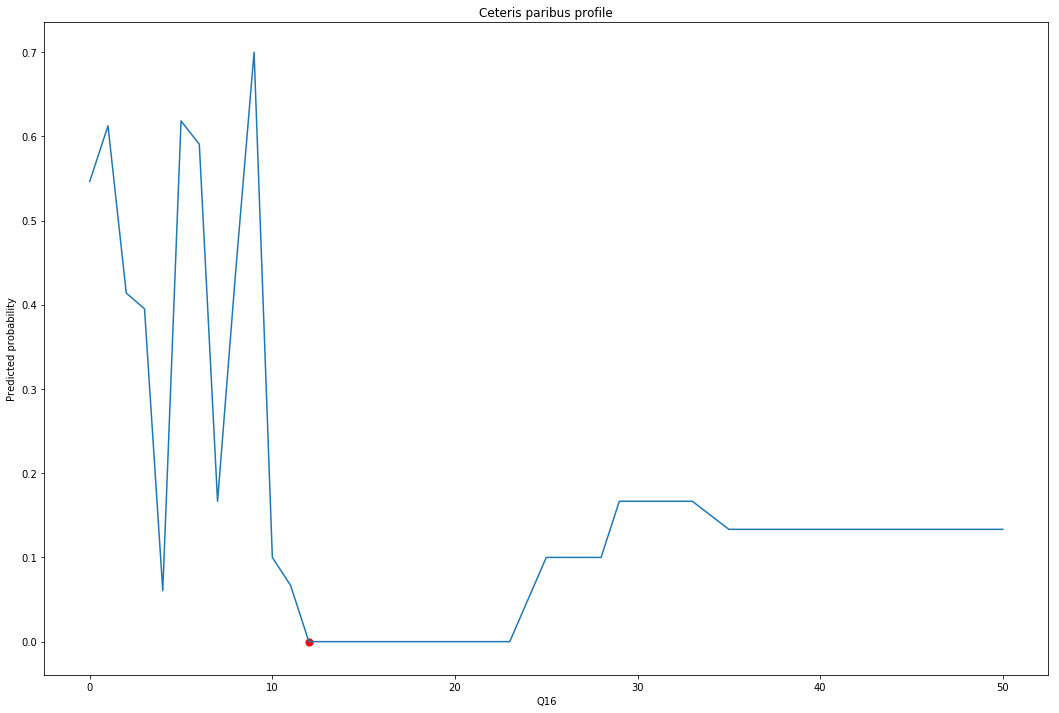

In [156]:
cp_profile('Q16', 1612, X, y, clf)

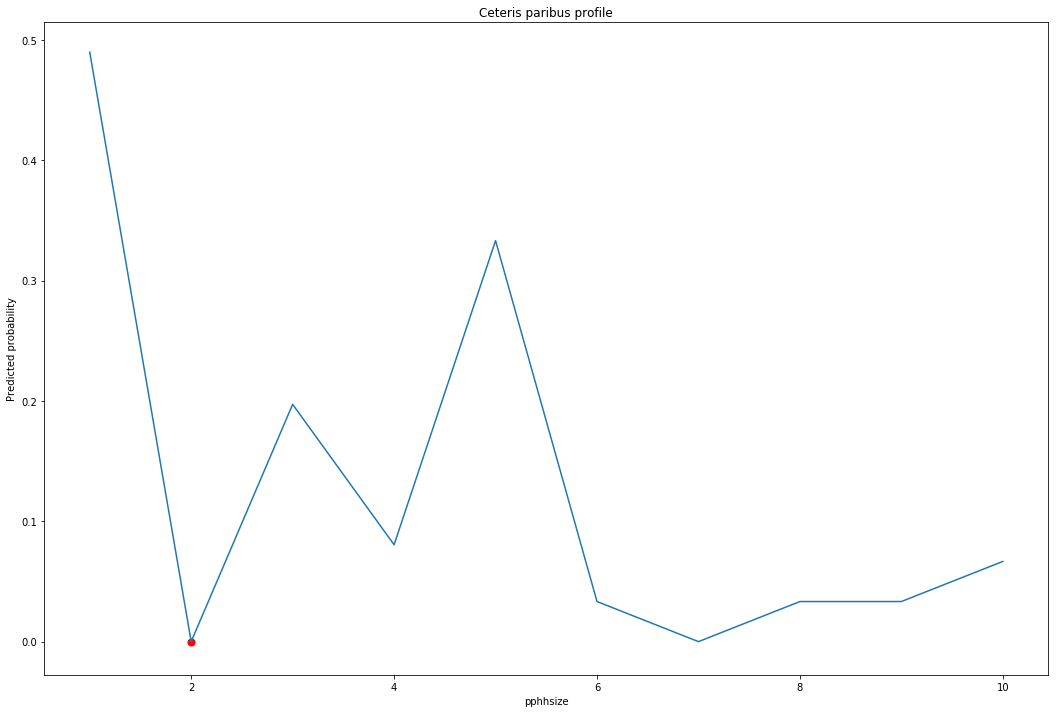

In [157]:
cp_profile('pphhsize', 1612, X, y, clf)